# SVD Long Way

In [1]:
import numpy as np

In [3]:
X = np.array([[3,1,4],[1,5,9],[2,6,5],[3,5,8]])

In [4]:
X

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [3, 5, 8]])

In [5]:
np.linalg.svd(X)

(array([[-0.26802639,  0.76988792, -0.34806425, -0.46291005],
        [-0.60739274, -0.06748192,  0.72889104, -0.3086067 ],
        [-0.4615509 , -0.60449571, -0.57124216, -0.3086067 ],
        [-0.5883933 ,  0.1931417 , -0.145779  ,  0.77151675]]),
 array([16.78688292,  2.92536964,  2.37545244]),
 array([[-0.24422364, -0.53710162, -0.80738879],
        [ 0.55125189, -0.76188232,  0.34008335],
        [-0.79779456, -0.36201821,  0.48214796]]))

In [6]:
U,S,VT = np.linalg.svd(X)

In [8]:
U

array([[-0.26802639,  0.76988792, -0.34806425, -0.46291005],
       [-0.60739274, -0.06748192,  0.72889104, -0.3086067 ],
       [-0.4615509 , -0.60449571, -0.57124216, -0.3086067 ],
       [-0.5883933 ,  0.1931417 , -0.145779  ,  0.77151675]])

In [9]:
np.round(U.dot(U.T),10) # The transpose of U is the inverse (up to rounding error)

array([[ 1., -0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [10]:
np.round(VT.dot(VT.T),10)

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

# Brute Force Calculation of PCA

Step 1: Calculate Column Means of X: We need to center the data

In [12]:
X

array([[3, 1, 4],
       [1, 5, 9],
       [2, 6, 5],
       [3, 5, 8]])

In [11]:
column_means = np.mean(X,axis=0)
column_means

array([2.25, 4.25, 6.5 ])

Step 2: Center X-data by subtracting off column means from each axis

In [13]:
np.broadcast_arrays(column_means,X)[0]

array([[2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ],
       [2.25, 4.25, 6.5 ]])

In [15]:
M=X-np.broadcast_arrays(column_means,X)[0]
M

array([[ 0.75, -3.25, -2.5 ],
       [-1.25,  0.75,  2.5 ],
       [-0.25,  1.75, -1.5 ],
       [ 0.75,  0.75,  1.5 ]])

In [16]:
M1 = (M.T).dot(M)
M1

array([[ 2.75, -3.25, -3.5 ],
       [-3.25, 14.75,  8.5 ],
       [-3.5 ,  8.5 , 17.  ]])

Step4: Calculate SVD of Scatter Matrix

In [18]:
np.linalg.svd(M1)

(array([[-0.20579862,  0.02334853,  0.97831578],
        [ 0.64614962, -0.74756061,  0.15376543],
        [ 0.73494054,  0.66378308,  0.1387603 ]]),
 array([25.45315588,  7.304084  ,  1.74276012]),
 array([[-0.20579862,  0.64614962,  0.73494054],
        [ 0.02334853, -0.74756061,  0.66378308],
        [ 0.97831578,  0.15376543,  0.1387603 ]]))

In [20]:
U,S,VT = np.linalg.svd(M1)
S # S gives the "singular values"

array([25.45315588,  7.304084  ,  1.74276012])

In [21]:
S/sum(S)

array([0.73777263, 0.21171258, 0.05051479])

In [22]:
# 73.78% of variance is explained by PCA 1

# 21.17% of variance is explained by PCA 2

# 0.05% of variance is explained by PCA 2

In [23]:
PCA1,PCA2,PCA3 = VT

In [25]:
PCA1

array([-0.20579862,  0.64614962,  0.73494054])

In [26]:
PCA2

array([ 0.02334853, -0.74756061,  0.66378308])

In [27]:
PCA3

array([0.97831578, 0.15376543, 0.1387603 ])

# Easier Method

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=3)
pca.fit(X)
pca.components_

array([[ 0.20579862, -0.64614962, -0.73494054],
       [-0.02334853,  0.74756061, -0.66378308],
       [ 0.97831578,  0.15376543,  0.1387603 ]])

In [30]:
pca.explained_variance_ratio_

array([0.73777263, 0.21171258, 0.05051479])

# Example with Gaussian Cloud

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Need to the find the dataset he used

In [32]:
data = pd.read_csv("clouds.csv")

In [35]:
data.head()

,x,y
0,0.894677,4.474800
1,1.006291,4.267872
2,1.688823,4.136460
3,2.695726,4.596911
4,2.304983,4.703092


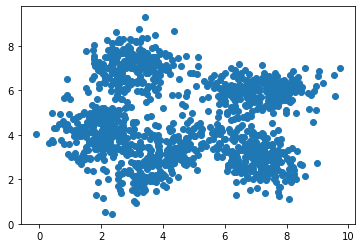

In [34]:
plt.scatter(data['x'],data['y'])

In [38]:
def FirstPCA(A,n):
    U,Sigma,V = np.linalg.svd(A)
    UT=U.T
    M=np.zeros_like(A).astype(float)
    for j in range(n):
        B=np.outer(UT[j],V[j])*Sigma[j]
        M+=B
        return(M)

In [39]:
from PIL import Image

In [46]:
g = plt.imread('interesting_giraffe.jpg')
A = np.array(g)

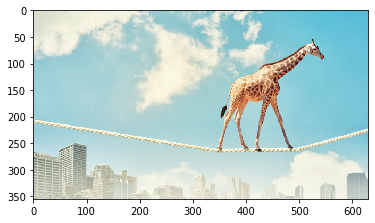

In [47]:
plt.imshow(A,cmap='gray')